# Logistic Regression (Machine Learning)

In [1]:
# Let's start with importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Data

data=pd.read_csv("D:\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Checking the Shape of the Data (How many rows and columns are available)

data.shape

(768, 9)

In [4]:
# Describing the Data (To check all the details are filled or not, if found null values then fill them)

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


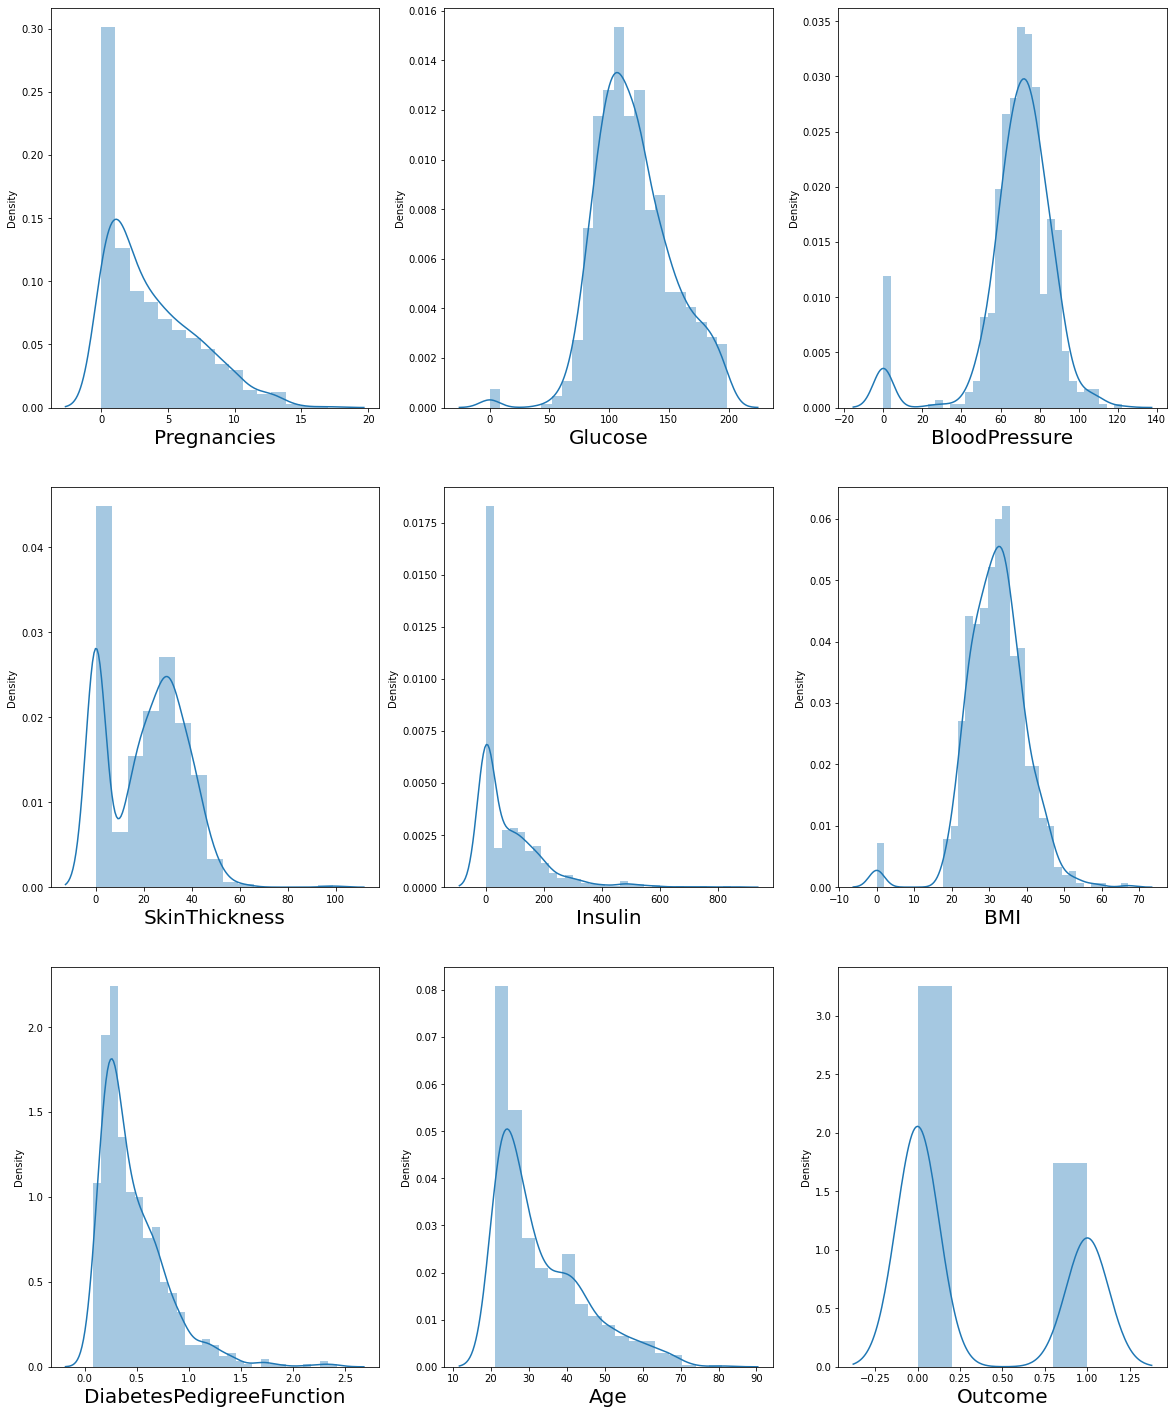

In [5]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [6]:
# replacing zero values with the mean of the column

data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

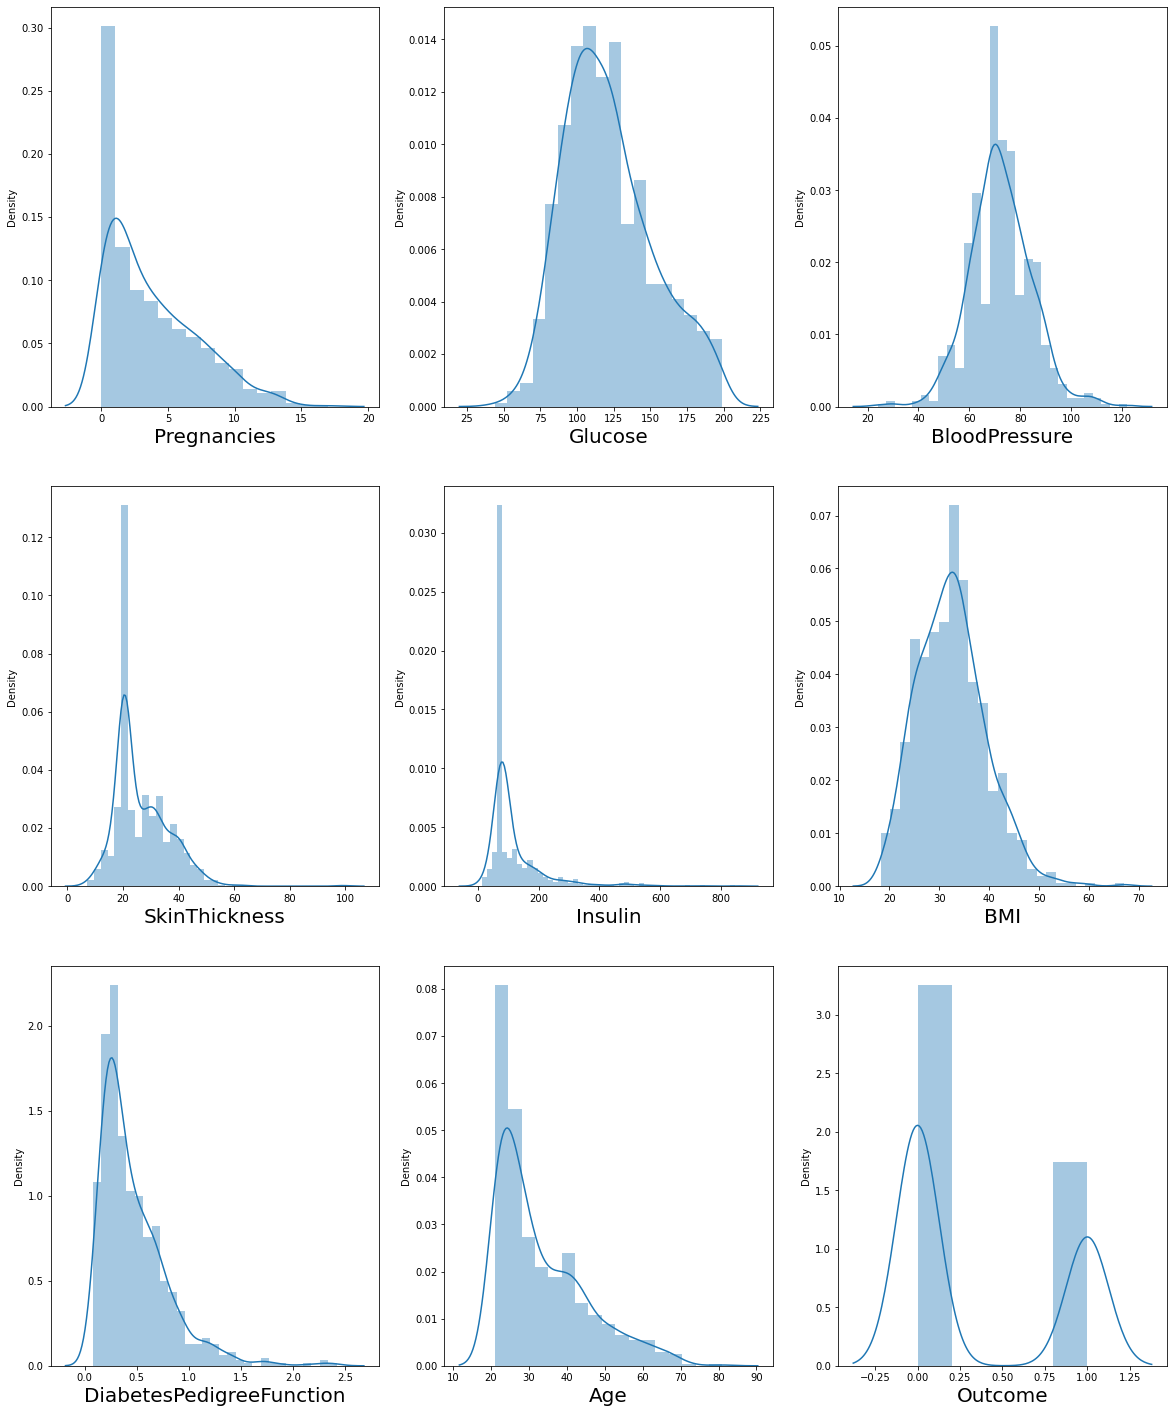

In [7]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Now we have deal with the 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

In [8]:
# We are removing the top 2% data from the Pregnancies Column

q=data['Pregnancies'].quantile(0.98)
data_cleaned=data[data['Pregnancies']<q]

# We are removing the top 5% data from the Insulin Column

q=data_cleaned['Insulin'].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned['Insulin']<q]

# We are removing the top 1% data from the BMI Column

q=data_cleaned['BMI'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['BMI']<q]

# We are removing the top 1% data from the SkinThickness Column

q=data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['SkinThickness']<q]

# We are removing the top 1% data from the DiabetesPredigreeFunction Column

q=data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

# We are removing the top 1% data from the Age Column

q=data_cleaned['Age'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['Age']<q]

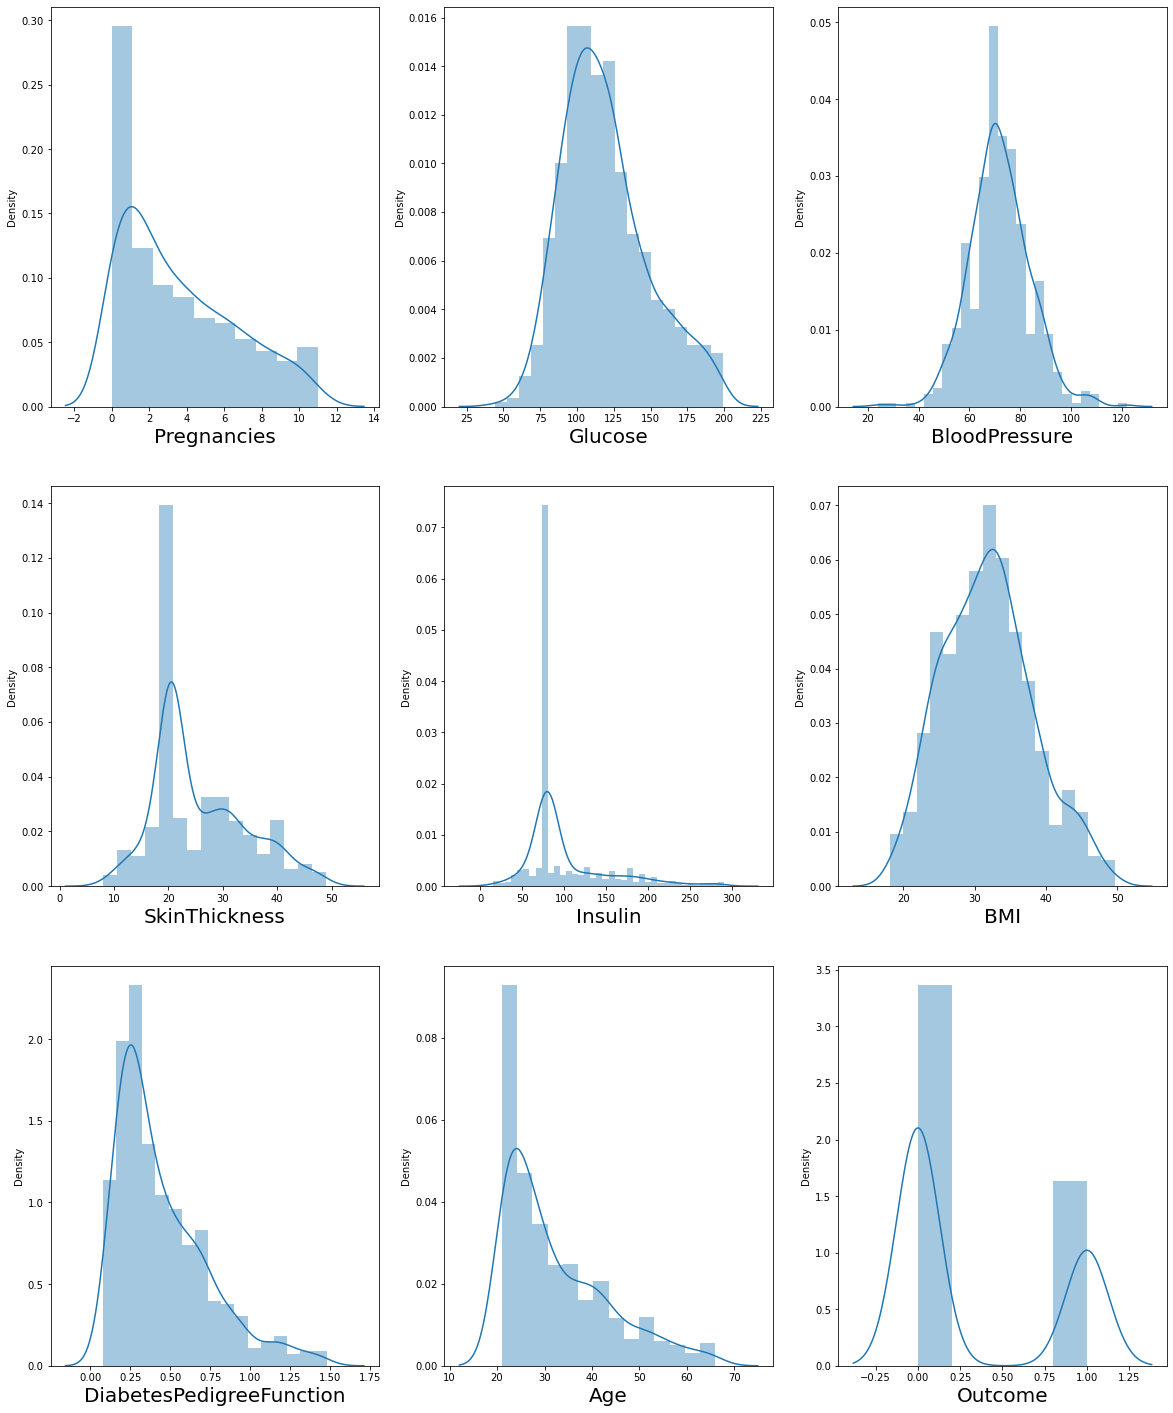

In [9]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### The data looks much better now then before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [10]:
X=data_cleaned.drop(columns = ['Outcome'])
y=data_cleaned['Outcome']

#### Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

<function matplotlib.pyplot.show(close=None, block=None)>

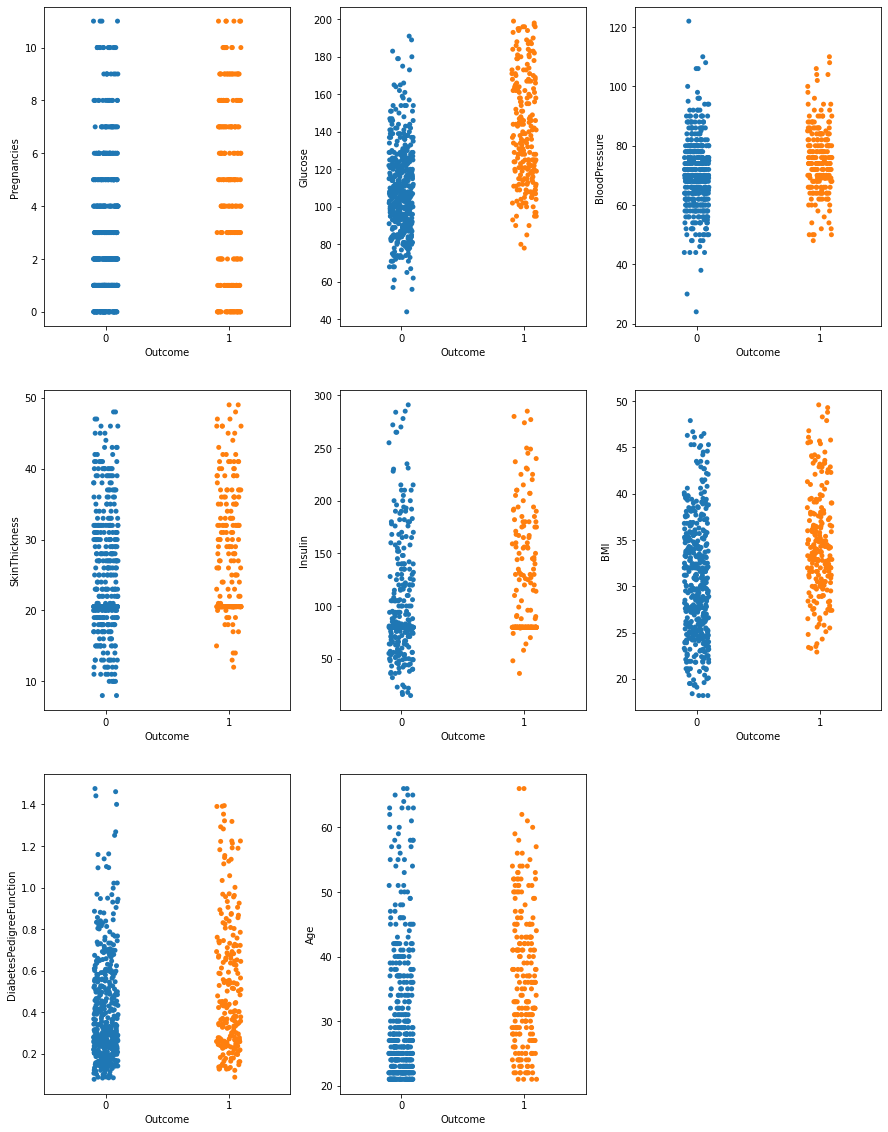

In [11]:
# Let's see how features are related to close

plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show

#### Great !!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [12]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [13]:
# Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1-R2))

vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns

# Let's check the values

vif

,vif,Features
0,1.448659,Pregnancies
1,1.303663,Glucose
2,1.259586,BloodPressure
3,1.462639,SkinThickness
4,1.274236,Insulin
5,1.502494,BMI
6,1.042625,DiabetesPedigreeFunction
7,1.663991,Age


#### All the VIF are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=105)

In [15]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_pred = log_reg.predict(x_test)

In [17]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7988165680473372

In [18]:
# Confusion Matrix

conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[103,  14],
       [ 20,  32]], dtype=int64)

In [19]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
true_negative=conf_mat[1][0]
false_negative=conf_mat[1][1]

In [20]:
# Breaking down the formula for Accuracy

Accuracy=(true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
Accuracy

0.727810650887574

In [21]:
# Precision

Precision = true_positive / (true_positive + false_positive)
Precision

0.8803418803418803

In [22]:
# Recall

Recall = true_positive / (true_positive + false_negative)
Recall

0.762962962962963

In [23]:
# F1 Score

F1_Score=2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8174603174603174

In [24]:
# Area Under Curve

auc = roc_auc_score(y_test,y_pred)
auc

0.7478632478632479

### ROC

#### fpr = False Positive Rate increasing frequency
#### tpr = True Positive Rate increasing frequency
#### thresholds  = Decreasing thresholds on the decision function used to compute fpr and tpr.
#### fpr, tpr, thresholds = roc_curve(y_test , y_pred)

In [25]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [26]:
fpr

array([0.        , 0.11965812, 1.        ])

In [27]:
tpr

array([0.        , 0.61538462, 1.        ])

In [28]:
thresholds

array([2, 1, 0], dtype=int64)

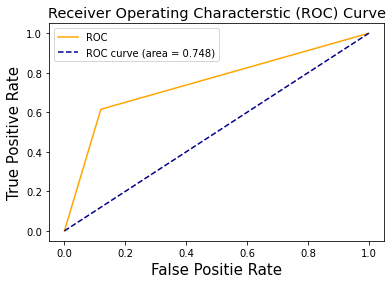

In [29]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area = %0.3f)'%auc)
plt.xlabel("False Positie Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("Receiver Operating Characterstic (ROC) Curve", fontsize=14.5)
plt.legend()
plt.show()

### We have successfully build our Logistic Regression Model.